In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline

In [100]:
def load_csv(file_path):
    return pd.read_csv('sales_data_sample.csv', encoding='latin1')

In [102]:
def basic_statistics(data, columns_to_analyze=None):
    if columns_to_analyze is None:
        columns_to_analyze = data.select_dtypes(include='number').columns
    stats = data[columns_to_analyze].describe()
    return stats

In [104]:
def plot_histogram(data, column, bins=30, alpha=0.7):
    plt.figure(figsize=(10, 6))  # Larger plot size
    plt.hist(data[column], bins=bins, alpha=alpha, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.5)
    plt.show()

In [106]:
def plot_scatter(data, column1, column2, alpha=0.7):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[column1], data[column2], alpha=alpha, color='coral')
    plt.title(f'Scatter Plot of {column1} vs {column2}')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.grid(alpha=0.5)
    plt.show()

In [110]:
def plot_line(data, date_column, value_column):
    data[date_column] = pd.to_datetime(data[date_column])
    data.sort_values(date_column, inplace=True)
    plt.figure(figsize=(12, 6))
    plt.plot(data[date_column], data[value_column], marker='o', linestyle='-', color='blue')
    plt.title(f'Line Plot of {value_column} Over Time')
    plt.xlabel(date_column)
    plt.ylabel(value_column)
    plt.grid(alpha=0.5)
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [112]:
def ask_huggingface(question, model='distilgpt2'):
    nlp = pipeline('text-generation', model=model)
    response = nlp(question, max_length=150, num_return_sequences=1)[0]['generated_text']
    return response.strip()

In [114]:
def main():
    file_path = r'sales_data_sample.csv' 
    data = load_csv(file_path)

In [116]:
print("Basic Statistics:")
print(basic_statistics(data, columns_to_analyze=['SALES', 'QUANTITYORDERED', 'PRICEEACH']))


Basic Statistics:
              SALES  QUANTITYORDERED    PRICEEACH
count   2823.000000      2823.000000  2823.000000
mean    3553.889072        35.092809    83.658544
std     1841.865106         9.741443    20.174277
min      482.130000         6.000000    26.880000
25%     2203.430000        27.000000    68.860000
50%     3184.800000        35.000000    95.700000
75%     4508.000000        43.000000   100.000000
max    14082.800000        97.000000   100.000000


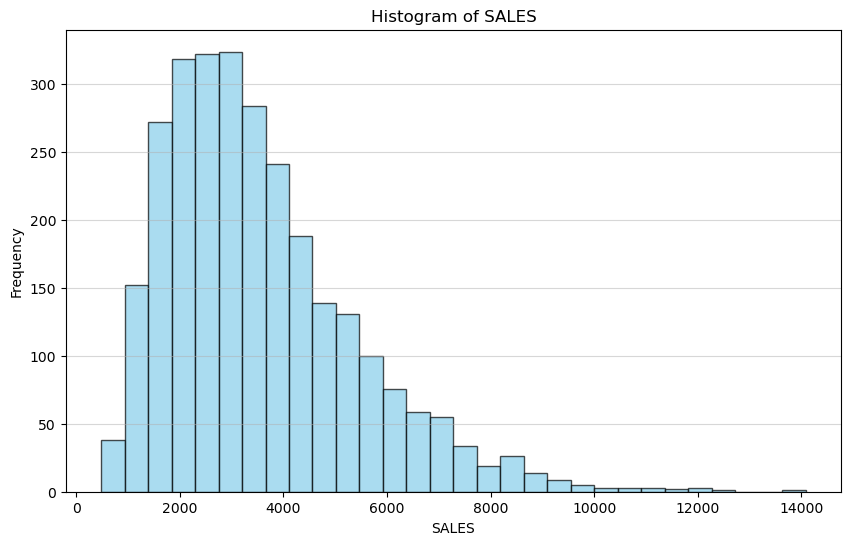

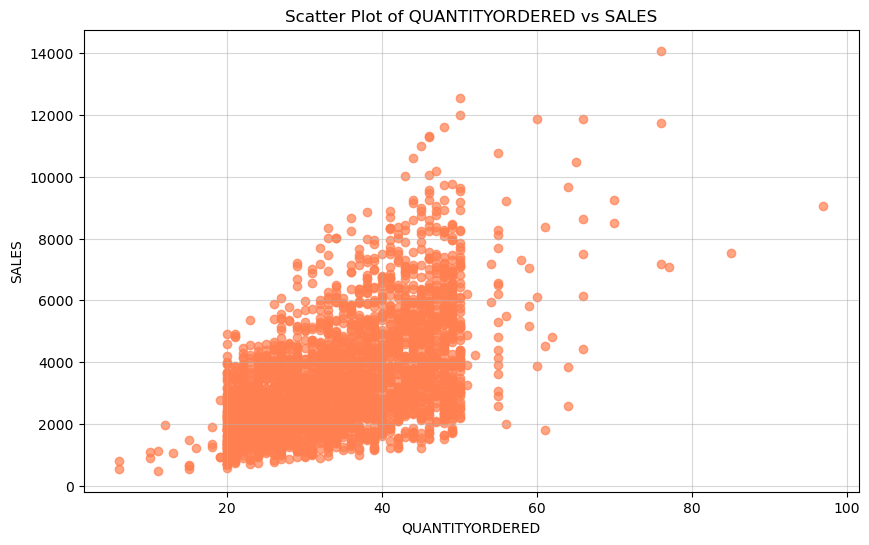

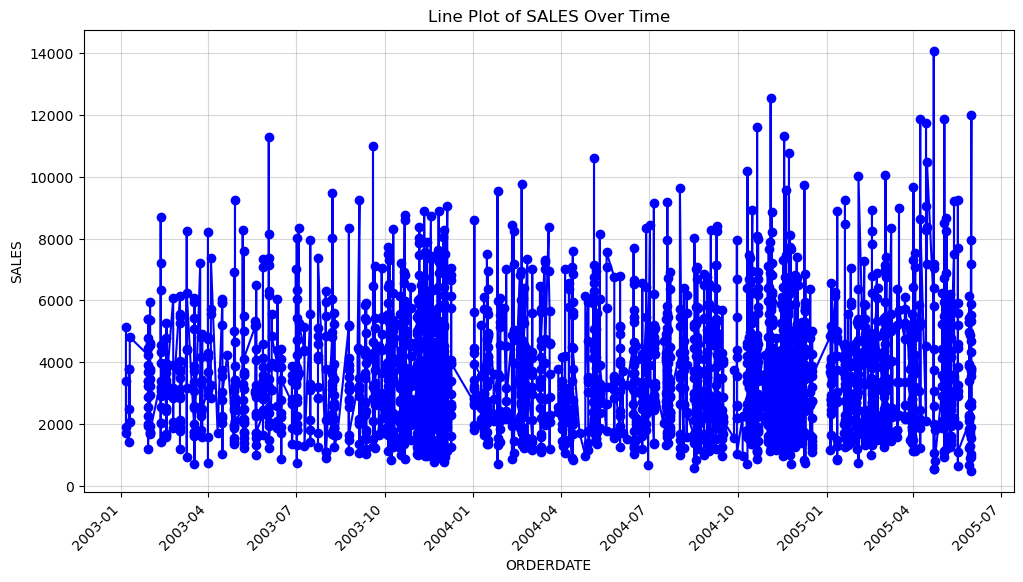

In [118]:
plot_histogram(data, 'SALES')
plot_scatter(data, 'QUANTITYORDERED', 'SALES')
plot_line(data, 'ORDERDATE', 'SALES')

In [126]:
mean_sales = data['SALES'].mean()  
print(f"Mean of 'SALES' column: {mean_sales}")  

Mean of 'SALES' column: 3553.889071909316


In [128]:
question = "What are the key insights from the sales data?" 
answer = ask_huggingface(question)  
print(f"Answer from HuggingFace model: {answer}")  

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Answer from HuggingFace model: What are the key insights from the sales data?


The most important insights from the sales data?
There are few clear-cut strategies available to start a business that has the ability to measure customer behavior on an exponential scale. If there's no clear-cut strategy available, do you have the tools to quickly get to the end of the sales data?
If you work your way through surveys, what techniques are available to get the information you need to put your brand into action and drive traffic to get traction? A common question you'll see in our sales data chart, is a key question to know more about customer behavior. How do you learn and what skills can drive customers to buy a product that's on top of a reasonable


In [132]:
if __name__ == "__main__":
    main()